# Regularization Demonstration

In this notebook, we will demonstrate the need for regularization in machine learning models. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function. Overfitting occurs when a model learns the noise and outliers in the training data to the extent that it negatively impacts the model's performance on new data.


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score


## Creating a Synthetic Dataset

We will create a synthetic dataset for a function `y = cos(1.5 * pi * x)` with some random noise.


In [3]:
# Function for creating the dataset
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# Create the dataset
np.random.seed(0)
n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


## Fitting Polynomial Models

We will fit polynomial models of different degrees to this data and visualize the results. A polynomial of degree 1 is a simple linear regression model. As the degree increases, the model becomes more complex and can capture more variation in the data, but it also becomes more prone to overfitting.

### We are demonstrating two new techniques here

#### Cross-Validation:

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.

In the notebook, we used 10-fold cross-validation as specified` by c`v=10 in `the cross_val_score func`tion. In 10-fold cross-validation, the original sample is randomly partitioned into 10 equal sized subsamples. Of the 10 subsamples, a single subsample is retained as the validation data for testing the model, and the remaining 9 subsamples are used as training data. The cross-validation process is then repeated 10 times, with each of the 10 subsamples used exactly once as the validation data. The 10 results from the folds can then be averaged (or otherwise combined) to produce a single estimat

#### Pipeline:

In scikit-learn, a pipeline is a tool for simplifying the process of building and evaluating a model. It sequentially applies a list of transforms and a final estimator. Intermediate steps of the pipeline must be 'transforms', that is, they must implement fit and transform methods. The final estimator only needs to implement fit.

In belowbook, weused a pipeline to combine the steps of creating polynomial features and applying linear regres. Here, `PolynomialFeatures` is a transformer that generates polynomial and interaction features. It transforms our input data by adding polynomial features of a given degree. This allows us to model nonlinear relationships..

By using a pipeline, we can ensure that the same sequence of transformations is applied to the training data and the test data. This is particularly important when we're doing something like cross-validation, where the data that is used for training and the data that is used for testing changes with each fold.ion:ion.

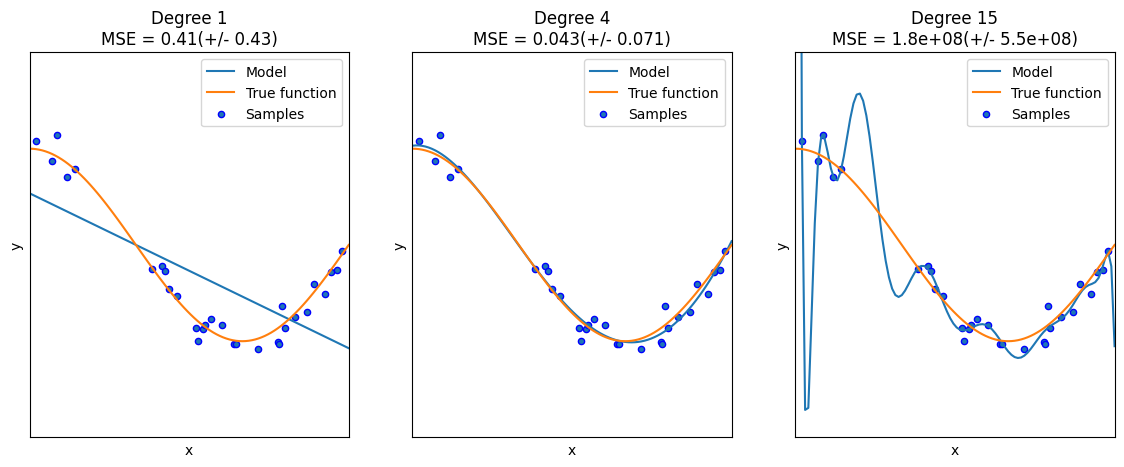

In [7]:
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2}(+/- {:.2})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()


## Observations

From the above plots, we can observe that the model with degree 1 (simple linear regression) underfits the data. It is too simple to capture the nonlinear relationship between X and Y.

The model with degree 4 seems to fit the data well. It captures the underlying relationship without fitting the noise in the data.

The model with degree 15 overfits the data. It is too complex and fits the noise in the data, leading to a high variance.

This demonstrates the bias-variance tradeoff. Models with high bias (like the degree 1 model) are too simple and tend to underfit the data, while models with high variance (like the degree 15 model) are too complex and tend to overfit the data. The goal is to find a balance between bias and variance that minimizes the total error.


## Regularization

Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function. The penalty term encourages the model to have smaller coefficients, which makes the model simpler and less likely to fit the noise in the data.

Let's apply Ridge Regression (L2 regularization) to the degree 15 model and see how it affects the fit.


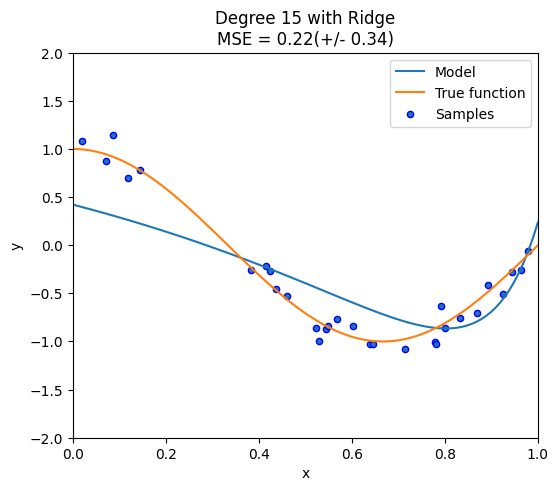

In [8]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
pipeline = Pipeline([("polynomial_features", polynomial_features),
                     ("ridge_regression", ridge)])
pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                         scoring="neg_mean_squared_error", cv=10)

# Plotting
plt.figure(figsize=(6, 5))
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
plt.plot(X_test, true_fun(X_test), label="True function")
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlabel("x")
plt.ylabel("y")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.title("Degree {} with Ridge\nMSE = {:.2}(+/- {:.2})".format(
    degrees[2], -scores.mean(), scores.std()))
plt.show()


## Observations

As we can see, the Ridge Regression model with degree 15 fits the data better than the non-regularized model with degree 15. It does not fit the noise in the data, and the plot shows that it captures the underlying relationship more accurately.

This demonstrates the power of regularization. Even though the model is complex (degree 15), regularization prevents it from overfitting the data. This is why regularization is a crucial technique in machine learning for improving model generalization.
